In [ ]:
#!pip install opencv-python --user

In [1]:
from tensorflow.keras.models import load_model
import os
import numpy as np

import cv2
import matplotlib.pyplot as plt

from PIL import Image
import os


import cv2
from IPython.display import display, clear_output
from PIL import Image

In [2]:
cv2.__version__

'4.6.0'

In [ ]:
# os.chdir(r'../Datasets/')

In [3]:
'''
LOAD MODEL
'''
#model = load_model('../19 Face Mask Detection/recognize_mask.h5')
model = load_model(filepath = 'recognize_mask.h5', compile=False)


2023-10-11 10:51:09.948315: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 111, 111, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 109, 109, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 52, 52, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 26, 26, 64)       0

In [5]:
model.input_shape

(None, 224, 224, 3)

In [ ]:
# webcam = cv2.VideoCapture(0) #Use camera 0


# while True:
#     (rval, im) = webcam.read()
    
#     # Show the image
#     cv2.imshow('LIVE',   im)
#     key = cv2.waitKey(10)
#     # if Esc key is pressed then break out of the loop 
#     if key == 27: #The Esc key
#         break

#     frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       
        
#         # Stop video
# webcam.release()

# # Close all started windows
# cv2.destroyAllWindows()

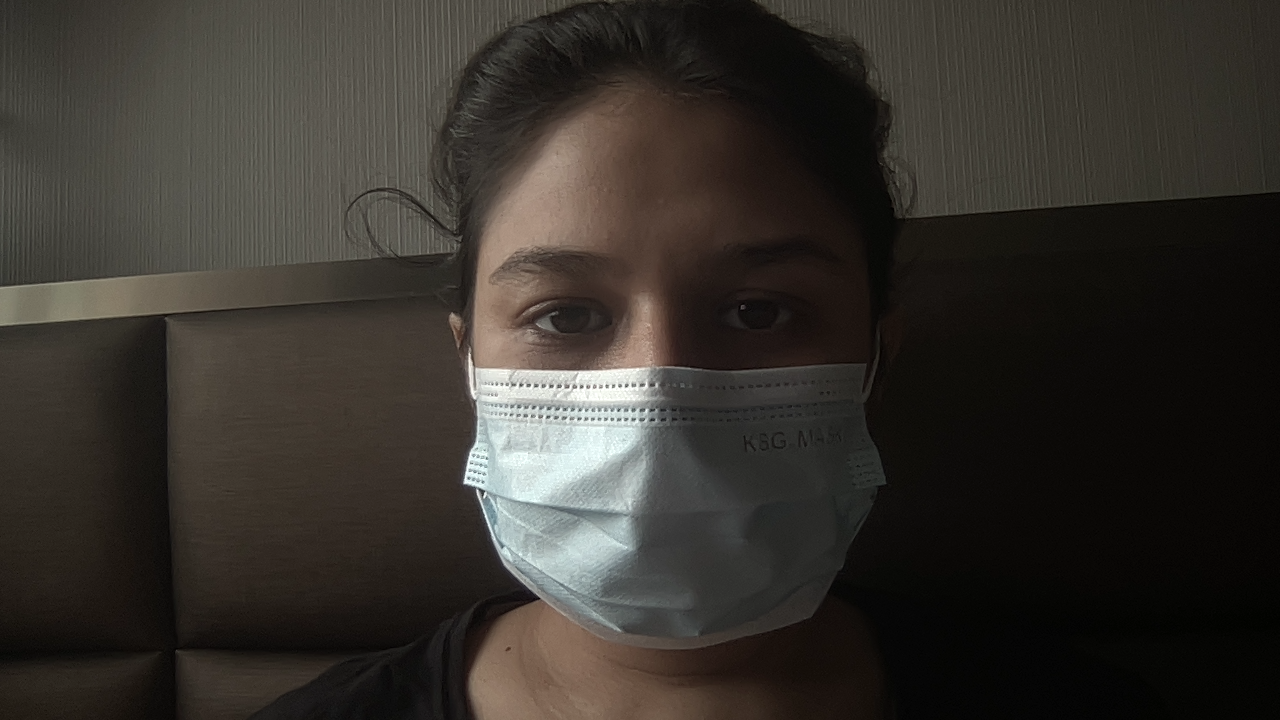

In [6]:
import cv2
from IPython.display import display, clear_output
from PIL import Image

webcam = cv2.VideoCapture(0)

try:
    for _ in range(1):  # Display 1 frames for example
        (rval, im) = webcam.read()
        frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
        img = Image.fromarray(frame)
        
        clear_output(wait=True)
        display(img)
except KeyboardInterrupt:
    print("Stream stopped")

webcam.release()


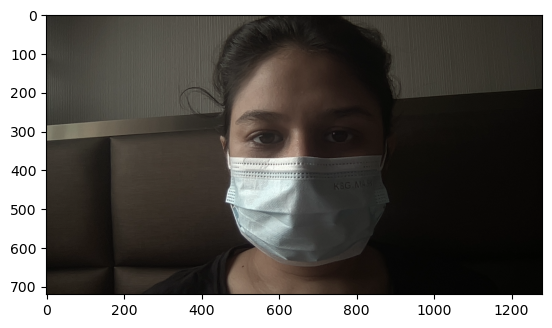

In [7]:
image1 = Image.fromarray(frame)
plt.imshow(image1)
plt.show()

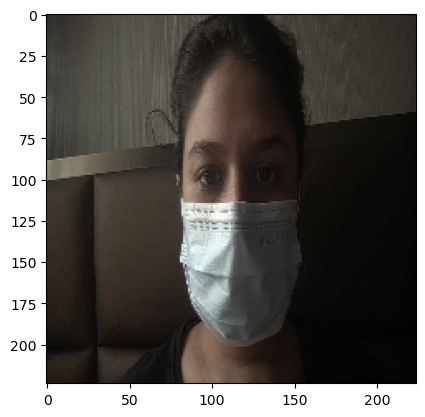

In [8]:
resize_frame = cv2.resize(frame, (224,224))
plt.imshow(resize_frame)
plt.show()

In [9]:
img = resize_frame.astype('float32')
img /= 255
img = img.reshape((1,224,224,3))

In [10]:
img.shape

(1, 224, 224, 3)

In [11]:
'''
PREDICTING
'''
 
ret = model.predict(img, batch_size=1) 

1/1 [==============================] - 0s 88ms/step


In [12]:
ret

array([[0.08973749]], dtype=float32)

In [13]:
result=np.around(ret)

In [14]:
result

array([[0.]], dtype=float32)

In [15]:
if result == 1:
    prediction = 'No Mask'
else:
    prediction = 'Mask'
    
prediction

'Mask'

### Putting it all Together as a UDF
    1. capture_video()  -Captures the video and returns the captured image frame as an array
    2. check mask() - uses the frame array returned in previous step, pre-processes it and makes the prediction 

In [ ]:
# def capture_video():
#     webcam = cv2.VideoCapture(0) #Use camera 0


#     while True:
#         (rval, im) = webcam.read()
    
#         cv2.imshow('LIVE', im)
#         key = cv2.waitKey(10)
#         # if Esc key is pressed then break out of the loop 
#         if key == 27: #The Esc key
#             break
#         frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)       
        
#     # Stop video
#     webcam.release()

#     # Close all started windows
#     cv2.destroyAllWindows()
#     return frame

In [16]:
def capture_video():
    
    webcam = cv2.VideoCapture(0)
    
    try:
        for _ in range(10):  # Display 10 frames for example
            (rval, im) = webcam.read()
            frame = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
            img = Image.fromarray(frame)
        
            clear_output(wait=True)
            #display(img)
    except KeyboardInterrupt:
        print("Stream stopped")

    webcam.release()
    return frame
    

In [17]:
def check_mask():
    frame = capture_video()
    resize_frame = cv2.resize(frame, (224,224))
    
    img = resize_frame.astype('float32')
    img /= 255
    img = img.reshape((1,224,224,3))      # only last frame i.e 10th frame prediction
    model = load_model('recognize_mask.h5')
    proba = model.predict(img, batch_size=1, verbose=0)
    result=np.around(proba)
    #plt.imshow(frame)

    if result == 1:
        prediction = 'No Mask'
    else:
        prediction = 'Mask'
    return (prediction,frame,proba,resize_frame)

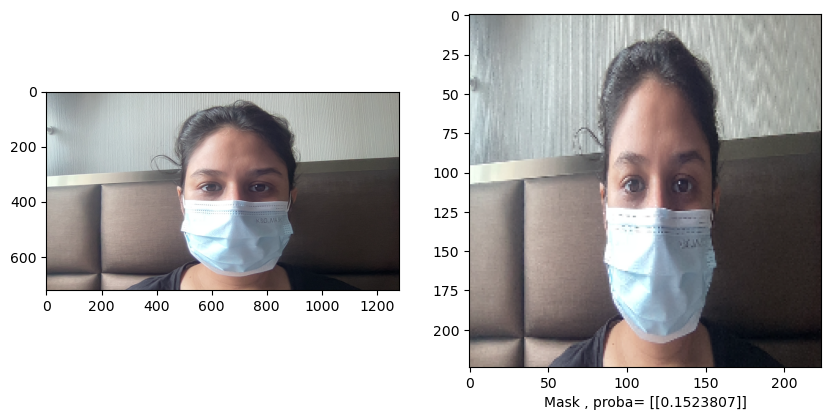

In [18]:
(prediction,frame,proba,resize_frame) = check_mask()
image1 = Image.fromarray(frame)
image2 = Image.fromarray(resize_frame)

# plt.imshow(image1)
# plt.imshow(image2)

fig, ax = plt.subplots(1, 2, figsize=(10, 5))
ax[0].imshow(frame)
ax[1].imshow(resize_frame)
ax[1].set_xlabel(prediction + " , proba= " + str(proba))
plt.show()
